In [ ]:
'hello'

'hello'

In [ ]:
!pip3 install opencv-python
!pip install tflearn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
#image_segment
import cv2
import numpy as np
import os

def getAreaOfFood(img1):
    data=os.path.join(os.getcwd(),"images")
    if os.path.exists(data):
        print('folder exist for images at ',data)
    else:
        os.mkdir(data)
        print('folder created for images at ',data)

    cv2.imwrite('{}\\1 original image.jpg'.format(data),img1)
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\2 original image BGR2GRAY.jpg'.format(data),img)
    img_filt = cv2.medianBlur( img, 5)
    cv2.imwrite('{}\\3 img_filt.jpg'.format(data),img_filt)
    img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2)
    cv2.imwrite('{}\\4 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #make change here


	# find contours. sort. and find the biggest contour. the biggest contour corresponds to the plate and fruit.
    mask = np.zeros(img.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    cv2.imwrite('{}\\5 mask.jpg'.format(data),mask)
    img_bigcontour = cv2.bitwise_and(img1,img1,mask = mask)
    cv2.imwrite('{}\\6 img_bigcontour.jpg'.format(data),img_bigcontour)

	# convert to hsv. otsu threshold in s to remove plate
    hsv_img = cv2.cvtColor(img_bigcontour, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\7 hsv_img.jpg'.format(data),hsv_img)
    h,s,v = cv2.split(hsv_img)
    mask_plate = cv2.inRange(hsv_img, np.array([0,0,50]), np.array([200,90,250]))
    cv2.imwrite('{}\\8 mask_plate.jpg'.format(data),mask_plate)
    mask_not_plate = cv2.bitwise_not(mask_plate)
    cv2.imwrite('{}\\9 mask_not_plate.jpg'.format(data),mask_not_plate)
    fruit_skin = cv2.bitwise_and(img_bigcontour,img_bigcontour,mask = mask_not_plate)
    cv2.imwrite('{}\\10 fruit_skin.jpg'.format(data),fruit_skin)

	#convert to hsv to detect and remove skin pixels
    hsv_img = cv2.cvtColor(fruit_skin, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\11 hsv_img.jpg'.format(data),hsv_img)
    skin = cv2.inRange(hsv_img, np.array([0,10,60]), np.array([10,160,255])) #Scalar(0, 10, 60), Scalar(20, 150, 255)
    cv2.imwrite('{}\\12 skin.jpg'.format(data),skin)
    not_skin = cv2.bitwise_not(skin); #invert skin and black
    cv2.imwrite('{}\\13 not_skin.jpg'.format(data),not_skin)
    fruit = cv2.bitwise_and(fruit_skin,fruit_skin,mask = not_skin) #get only fruit pixels
    cv2.imwrite('{}\\14 fruit.jpg'.format(data),fruit)

    fruit_bw = cv2.cvtColor(fruit, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\15 fruit_bw.jpg'.format(data),fruit_bw)
    fruit_bin = cv2.inRange(fruit_bw, 10, 255) #binary of fruit
    cv2.imwrite('{}\\16 fruit_bw.jpg'.format(data),fruit_bin)

	#erode before finding contours
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    erode_fruit = cv2.erode(fruit_bin,kernel,iterations = 1)
    cv2.imwrite('{}\\17 erode_fruit.jpg'.format(data),erode_fruit)

	#find largest contour since that will be the fruit
    img_th = cv2.adaptiveThreshold(erode_fruit,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\18 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask_fruit = np.zeros(fruit_bin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask_fruit, [largest_areas[-2]], 0, (255,255,255), -1)
    cv2.imwrite('{}\\19 mask_fruit.jpg'.format(data),mask_fruit)

	#dilate now
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask_fruit2 = cv2.dilate(mask_fruit,kernel2,iterations = 1)
    cv2.imwrite('{}\\20 mask_fruit2.jpg'.format(data),mask_fruit2)
    fruit_final = cv2.bitwise_and(img1,img1,mask = mask_fruit2)
    cv2.imwrite('{}\\21 fruit_final.jpg'.format(data),fruit_final)

	#find area of fruit
    img_th = cv2.adaptiveThreshold(mask_fruit2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\22 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    fruit_contour = largest_areas[-2]
    fruit_area = cv2.contourArea(fruit_contour)


	#finding the area of skin. find area of biggest contour
    skin2 = skin - mask_fruit2
    cv2.imwrite('{}\\23 skin2.jpg'.format(data),skin2)
	#erode before finding contours
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    skin_e = cv2.erode(skin2,kernel,iterations = 1)
    cv2.imwrite('{}\\24 skin_e .jpg'.format(data),skin_e )
    img_th = cv2.adaptiveThreshold(skin_e,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\25 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask_skin = np.zeros(skin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask_skin, [largest_areas[-2]], 0, (255,255,255), -1)
    cv2.imwrite('{}\\26 mask_skin.jpg'.format(data),mask_skin)


    skin_rect = cv2.minAreaRect(largest_areas[-2])
    box = cv2.boxPoints(skin_rect)
    box = np.int0(box)
    mask_skin2 = np.zeros(skin.shape, np.uint8)
    cv2.drawContours(mask_skin2,[box],0,(255,255,255), -1)
    cv2.imwrite('{}\\27 mask_skin2.jpg'.format(data),mask_skin2)

    pix_height = max(skin_rect[1])
    pix_to_cm_multiplier = 5.0/pix_height
    skin_area = cv2.contourArea(box)


    return fruit_area,fruit_bin ,fruit_final,skin_area, fruit_contour, pix_to_cm_multiplier

In [ ]:
#caleries
import cv2
import numpy as np
#density - gram / cm^3
density_dict = { 1:0.609, 2:0.94, 3:0.641,  4:0.641,5:0.513, 6:0.482,7:0.481}
#kcal
calorie_dict = { 1:52, 2:89,  3:41,4:16,5:40,6:47,7:18 }
#skin of photo to real multiplier
skin_multiplier = 5*2.3

def getCalorie(label, volume): #volume in cm^3
	calorie = calorie_dict[int(label)]
	density = density_dict[int(label)]
	mass = volume*density*1.0
	calorie_tot = (calorie/100.0)*mass
	return mass, calorie_tot, calorie #calorie per 100 grams

def getVolume(label, area, skin_area, pix_to_cm_multiplier, fruit_contour):
	area_fruit = (area/skin_area)*skin_multiplier #area in cm^2
	label = int(label)
	volume = 100
	if label == 1 or label == 5 or label == 7 or label == 6 : #sphere-apple,tomato,orange,kiwi,onion
		radius = np.sqrt(area_fruit/np.pi)
		volume = (4/3)*np.pi*radius*radius*radius
		#print (area_fruit, radius, volume, skin_area)

	if label == 2 or label == 4 or (label == 3 and area_fruit > 30): #cylinder like banana, cucumber, carrot
		fruit_rect = cv2.minAreaRect(fruit_contour)
		height = max(fruit_rect[1])*pix_to_cm_multiplier
		radius = area_fruit/(2.0*height)
		volume = np.pi*radius*radius*height

	if (label==4 and area_fruit < 30) : # carrot
		volume = area_fruit*0.5 #assuming width = 0.5 cm

	return volume

def calories(result,img):
    img_path =img # "C:/Users/M Sc-2/Desktop/dataset/FooD/"+str(j)+"_"+str(i)+".jpg"
    fruit_areas,final_f,areaod,skin_areas, fruit_contours, pix_cm = getAreaOfFood(img_path)
    volume = getVolume(result, fruit_areas, skin_areas, pix_cm, fruit_contours)
    mass, cal, cal_100 = getCalorie(result, volume)
    fruit_volumes=volume
    fruit_calories=cal
    fruit_calories_100grams=cal_100
    fruit_mass=mass
    #print("\nfruit_volumes",fruit_volumes,"\nfruit_calories",fruit_calories,"\nruit_calories_100grams",fruit_calories_100grams,"\nfruit_mass",fruit_mass)
    return fruit_calories

In [ ]:
!pip install tensorflow==2.12

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip freeze

absl-py==2.0.0
anyio==4.0.0
apricot-select==0.6.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asgiref==3.5.2
asttokens==2.0.5
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.1.0
cachetools==5.3.2
certifi==2022.6.15
cffi==1.16.0
charset-normalizer==2.1.0
colorama==0.4.5
comm==0.1.4
cycler==0.11.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.3
executing==0.9.1
fastjsonschema==2.18.1
filelock==3.10.4
flatbuffers==23.5.26
fonttools==4.33.3
fqdn==1.5.1
gast==0.4.0
google-auth==2.23.4
google-auth-oauthlib==1.0.0
google-pasta==0.2.0
grpcio==1.59.2
h5py==3.10.0
idna==3.3
ipykernel==6.26.0
ipython==8.4.0
ipython-genutils==0.2.0
ipywidgets==8.1.1
isoduration==20.11.0
jax==0.4.20
jedi==0.18.1
Jinja2==3.1.2
joblib==1.2.0
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.2
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.8.0
jupyter-lsp==2.2.0
jupyter_c

In [ ]:
#cnn_model
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf

def get_model(IMG_SIZE,no_of_fruits,LR):
    a = tf.constant(1)
    with tf.Session() as sess:
        tf.reset_default_graph()
	# try:
	# 	tf.reset_default_graph()
	# except:
	# 	print("tensorflow")
	convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')

	convnet = conv_2d(convnet, 32, 5, activation='relu')

	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 64, 5, activation='relu')

	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 128, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 64, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)


	convnet = conv_2d(convnet, 32, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)

	convnet = fully_connected(convnet, 1024, activation='relu')
	convnet = dropout(convnet, 0.8)

	convnet = fully_connected(convnet, no_of_fruits, activation='softmax')
	convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

	model = tflearn.DNN(convnet, tensorboard_dir='log')

	return model

TabError: inconsistent use of tabs and spaces in indentation (2832818304.py, line 16)

In [ ]:
#cnn_model
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf

def get_model(IMG_SIZE,no_of_fruits,LR):
    a = tf.constant(1)
    with tf.Session() as sess:
        tf.reset_default_graph()
	# try:
	# 	tf.reset_default_graph()
	# except:
	# 	print("tensorflow")
	convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')

	convnet = conv_2d(convnet, 32, 5, activation='relu')

	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 64, 5, activation='relu')

	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 128, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 64, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)


	convnet = conv_2d(convnet, 32, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)

	convnet = fully_connected(convnet, 1024, activation='relu')
	convnet = dropout(convnet, 0.8)

	convnet = fully_connected(convnet, no_of_fruits, activation='softmax')
	convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

	model = tflearn.DNN(convnet, tensorboard_dir='log')

	return model


import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
import glob
import cv2

path = r'./dataset'
IMG_SIZE = 400
LR = 1e-3
#Fruits_dectector-{}-{}.model
MODEL_NAME = 'Fruits_dectector-{}-{}.model'.format(LR, '5conv-basic')
no_of_fruits=7
percentage=0.3
no_of_images=100

def create_train_data(path):
    training_data = []
    folders=os.listdir(path)[0:no_of_fruits]
    for i in range(len(folders)):
        label = [0 for i in range(no_of_fruits)]
        label[i] = 1
        print(folders[i])
        k=0
        for j in glob.glob(path+"\\"+folders[i]+"\\*.jpg"):
            if(k==no_of_images):
                break
            k=k+1
            img = cv2.imread(j)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img),np.array(label)])
    np.save('training_{}_{}_{}.npz'.format(no_of_fruits,no_of_images,IMG_SIZE),training_data)
    shuffle(training_data)
    return training_data,folders

training_data,labels=create_train_data(path)
# training_data=np.load('training_{}_{}_{}.npz'.format(no_of_fruits,no_of_images,IMG_SIZE))
size=int(len(training_data)*percentage)
train = training_data[:-size]
test=training_data[-size:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = [i[1] for i in test]

model=get_model(IMG_SIZE,no_of_fruits,LR)

model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}),
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

model_save_at=os.path.join("model",MODEL_NAME)
model.save(model_save_at)
print("Model Save At",model_save_at)

Training Step: 79  | total loss: 1.33835 | time: 60.100s
| Adam | epoch: 010 | loss: 1.33835 - acc: 0.7306 -- iter: 448/488
Training Step: 80  | total loss: 1.23289 | time: 71.804s
| Adam | epoch: 010 | loss: 1.23289 - acc: 0.7470 | val_loss: 0.42227 - val_acc: 0.8365 -- iter: 488/488
--
INFO:tensorflow:C:\Users\user\Desktop\jupyter\model\Fruits_dectector-0.001-5conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.
Model Save At model\Fruits_dectector-0.001-5conv-basic.model


INFO:tensorflow:Restoring parameters from C:\Users\user\Desktop\jupyter\model\Fruits_dectector-0.001-5conv-basic.model
folder exist for images at  C:\Users\user\Desktop\jupyter\images


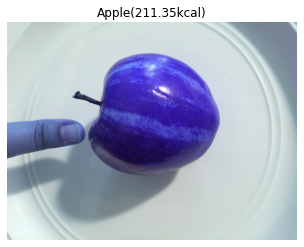

In [ ]:
#demo
#cnn_model
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf

def get_model(IMG_SIZE,no_of_fruits,LR):
    a = tf.constant(1)
    # with tf.Session() as sess:
    #     tf.reset_default_graph()
    try:
        tf.compat.v1.reset_default_graph()
    except:
        print("tensorflow")
    convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')

    convnet = conv_2d(convnet, 32, 5, activation='relu')

    convnet = max_pool_2d(convnet, 5)

    convnet = conv_2d(convnet, 64, 5, activation='relu')

    convnet = max_pool_2d(convnet, 5)

    convnet = conv_2d(convnet, 128, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = conv_2d(convnet, 64, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)


    convnet = conv_2d(convnet, 32, 5, activation='relu')
    convnet = max_pool_2d(convnet, 5)

    convnet = fully_connected(convnet, 1024, activation='relu')
    convnet = dropout(convnet, 0.8)

    convnet = fully_connected(convnet, no_of_fruits, activation='softmax')
    convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

    model = tflearn.DNN(convnet, tensorboard_dir='log')

    return model
import os
import cv2
import numpy as np
# import tflearn
# import tensorflow as tf
# from cnn import get_model
from calorie import calories

IMG_SIZE = 400
LR = 1e-3
no_of_fruits=7

MODEL_NAME = 'Fruits_dectector-{}-{}.model'.format(LR, '5conv-basic')

model_save_at=os.path.join("model",MODEL_NAME)
model=get_model(IMG_SIZE,no_of_fruits,LR)

model.load(model_save_at)
labels=list(np.load('labels.npy'))

test_images = ['test_image1.JPG']

for test_data in test_images:
    img=cv2.imread(test_data)
    img1=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    model_out=model.predict([img1])
    result=np.argmax(model_out)
    name=labels[result]
    cal=round(calories(result+1,img),2)
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.title('{}({}kcal)'.format(name,cal))
    plt.axis('off')
    plt.show()